In [1]:
# IST 718 Final Project 
#
# 1 1 1
#
# Richard Paterson (Tue Evening Class)
#
# Read in the "ouryelpreviews.csv" file
#
# prophet forecasting
#
# https://www.geeksforgeeks.org/decision-tree-implementation-python/
# 


In [2]:
# import packages for analysis and modeling
import pandas as pd #data frame operations
import numpy as np #arrays and math functions
from scipy.stats import uniform #for training and test splits
import statsmodels.api as smf #R-like model specification
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from math import sqrt
import datetime
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
import matplotlib.pyplot as plt #2D plotting
import seaborn as sns
from fbprophet import Prophet

import sys
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

print("Environmental Stuff")
print("===================")

#setup environment
import os
print("Current Working Directory " , os.getcwd())
os.chdir("C:/Users/Richpat/Documents/@syracuse coursework/@IST 718 Big Data Analytics (Python)/finalproject")

# System Information
import platform

print('Python is ' + platform.python_version())

pd.show_versions(as_json=True) # True to shorten output

Environmental Stuff
Current Working Directory  c:\Users\Richpat\Documents\@syracuse coursework\@IST 718 Big Data Analytics (Python)\finalproject
Python is 3.6.7
{'system': {'commit': None, 'python': '3.6.7.final.0', 'python-bits': 64, 'OS': 'Windows', 'OS-release': '10', 'machine': 'AMD64', 'processor': 'Intel64 Family 6 Model 142 Stepping 10, GenuineIntel', 'byteorder': 'little', 'LC_ALL': 'None', 'LANG': 'None', 'LOCALE': 'None.None'}, 'dependencies': {'pandas': '0.24.2', 'pytest': '4.4.1', 'pip': '19.1', 'setuptools': '41.0.1', 'Cython': '0.29.7', 'numpy': '1.16.3', 'scipy': '1.2.1', 'pyarrow': None, 'xarray': None, 'IPython': '7.5.0', 'sphinx': '2.0.1', 'patsy': '0.5.1', 'dateutil': '2.8.0', 'pytz': '2019.1', 'blosc': None, 'bottleneck': None, 'tables': None, 'numexpr': '2.6.9', 'feather': None, 'matplotlib': '3.0.3', 'openpyxl': '2.6.1', 'xlrd': '1.2.0', 'xlwt': '1.3.0', 'xlsxwriter': '1.1.7', 'lxml.etree': '4.3.3', 'bs4': '4.7.1', 'html5lib': '1.0.1', 'sqlalchemy': '1.3.2', 'pymy

In [3]:
# charting per input series dataframe
# 7 groups of charts are drawn
# type tells what the dataset is
#verbose 0=forecast only, 1=charts and forecast, 2=charts only
def seriesCharting(type, df, scVerbose):
    """ type - what is the underlying summarised dataset
        df - series input, value by month
    """
    print ('\n**SeriesCharting for ',type)
    ######################
    #data setup, by YYYYMM
    ######################
    groups = df['2008':'2017'].groupby(TimeGrouper('A'))
    print (pd.DataFrame.tail(df))
#    groups = df['2006':'2018'].groupby(Grouper(freq='M')).sum()
    years = DataFrame()
    ########
    #chart 1
    ########
    print ('\n****chart 1\n')
    print ('\n******requires work to fix this\n')
    #plt.figure()
    #plt.title('Chart1 - ')
    #i = 1
    #n_groups = len(groups)
    #for name, group in groups:
    #    plt.subplot((n_groups*100) + 10 + i)
    #    i += 1
    #    plt.plot(group)
    #plt.show()

    print ('\n****chart 2\n')
    # chart 2 #1
    plt.figure(1)
    plt.title('Chart2 - ')
    #width of display 
    fig = plt.gcf()
    fig.set_size_inches( 12, 7)
    plt.subplot(211)
    df.hist()
    #chart 2 #2
    plt.subplot(212)
    df.plot(kind='kde')
    plt.show()
    
    print ('\n****chart 3\n')
    plt.title('Chart3 - Value Boxplot')
    #width of display 
    #fig = plt.gcf()
    #fig.set_size_inches( 12, 7)
    #for name, group in groups:
    #    years[name.year] = group.values
    #years.boxplot()
    #plt.show()
    #print(years)
    
    # create a differenced series
    def difference(dataset, interval=1):
        diff = list()
        for i in range(interval, len(dataset)):
            value = dataset[i] - dataset[i - interval]
            diff.append(value)
        return Series(diff)
 
    X = df.values
    X = X.astype('float32')
    # difference data
    months_in_year = 12
    stationary = difference(X, months_in_year)
    stationary.index = df.index[months_in_year:]
    # check if stationary
    result = adfuller(stationary)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')

    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    # plot
    plt.title('Chart4 - ADF') 
    #width of display 
    fig = plt.gcf()
    fig.set_size_inches( 12, 7)
    stationary.plot()
    plt.show()
    
    #chart 5 - prices
    #################
    plt.title('Chart5 - Prices') 
    #width of display 
    fig = plt.gcf()
    fig.set_size_inches( 12, 7)
    df.plot()
    plt.show()

    # USING STATIONARY TIME SERIES LOOK FOR ACF & PACF
    ##################################################
    plt.title('Chart6 - ACF')
    #width of display 
    fig = plt.gcf()
    fig.set_size_inches( 12, 7)
    plot_acf(df, ax=plt.gca())
    plt.show()

    plt.title('Chart7 - PACF')
    #width of display 
    fig = plt.gcf()
    fig.set_size_inches( 12, 7)
    plot_pacf(df, ax=plt.gca())
    plt.show()

    return()

In [4]:
# charting per input series dataframe
# 7 groups of charts are drawn
# type tells what the dataset is
# freq period sbe 12
# freq type sbe M
# plot TRUE / FALSE
# value returned is forecast
def FBForecasting(type, df, freqP, freqT, verbose):
    matchStart=datetime.datetime.now()
    if verbose >= 1:
        print ('\n****Type ', type, "Freq. Period ", freqP, "Freq. Type ", freqT, "Verbose ", verbose)
    #print("\nStart time of check", matchStart)
    ##insert prophet code here
    #1
    if verbose<=1:
        bev_model = Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)
        bev_model.fit(df)
        ##
        #2
        future_dates = bev_model.make_future_dataframe(periods=freqP, freq=freqT)
        future_dates.tail()
        #3 MODEL
        forecast = bev_model.predict(future_dates)
        forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
        #4 MODEL
    if verbose>=1:
        bev_model.plot(forecast, uncertainty=True)
        plt.show()

        bev_model.plot_components(forecast)
        plt.show()
    ##
    matchEnd=datetime.datetime.now()
    if verbose>= 1:
        print("\nStart time of check", matchStart, "\tEnd time of check", matchEnd)
    #https://facebook.github.io/prophet/docs/diagnostics.html
    #https://pythondata.com/forecasting-time-series-data-prophet-part-4/
    metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()
    #print('metric_df', metric_df)
    metric_df.dropna(inplace=True)
    if verbose>=1:
        #from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
        print ('\nR-squared', r2_score(metric_df.y, metric_df.yhat))
        print ('\nMSE', mean_squared_error(metric_df.y, metric_df.yhat))
        print ('\nMAE', mean_absolute_error(metric_df.y, metric_df.yhat))
    #retobj=( r2_score(metric_df.y, metric_df.yhat), mean_squared_error(metric_df.y, metric_df.yhat), mean_absolute_error(metric_df.y, metric_df.yhat) )
    #return(retobj)
    return(forecast)

In [5]:
# Fix data (transform) and Forecast (prophet)

#verbose TBD - have to sort this out; make like 0=forecast only, 1=charts and forecast, 2=charts only

def fixNforecast(dfTall, fNfID, serStrt, serEnd, fNfTitle, fNfVerbose):

    ##FNF 1
    #transform tall to series
    
    dfSeries = pd.Series(dfTall)
    if fNfVerbose >= 1:
        print("\n***** input data dfSeries dtypes\n")
        print(pd.DataFrame.head(dfSeries))
    
    ##FNF 2
    #charting for series
    
    if fNfVerbose >= 1:
        seriesCharting(fNfTitle, dfSeries[(dfSeries.index>=serStrt)&(dfSeries.index<=serEnd)], fNfVerbose)
    
    ##FNF3
    
    prophetIn=pd.DataFrame(dfSeries)
    prophetIn.columns = ['y']
    prophetIn['ds']=dfSeries.index
    prophetIn['ds']=pd.to_datetime(prophetIn['ds'], format="%Y%m%d").dt.date
    prophetIn['ds']=prophetIn['ds'].astype(str)
    prophetIn=prophetIn[(prophetIn.ds>=serStrt)&(prophetIn.ds<=serEnd)]
    prophetIn=prophetIn.reset_index()
    prophetIn = prophetIn.drop(columns = ['dateyyyymm'])
    if fNfVerbose >= 1:
        print ('\n****before going into Prophet\n')
        print('max', prophetIn.ds.max())
        print('min', prophetIn.ds.min())
        print (prophetIn.describe())
        print (prophetIn[1:3])
    ########################################
    # Run the FB Prophet forecasting routine
    ########################################
    prophetForecast=FBForecasting(fNfTitle, prophetIn, 24, "M", fNfVerbose)
    
    prophetIn.columns = ['Date', 'Value']
    prophetIn=prophetIn.reset_index()
    prophetForecast=pd.concat([prophetForecast,prophetIn], axis=1)
    #prophetForecast.insert(0, 'Date', zds.values)
    prophetForecast.insert(0, 'ID', fNfID)
    
    ##FNF end
    return(prophetForecast)

In [6]:
# prepare for fixNforecast

#verbose TBD - have to sort this out; make like 0=forecast only, 1=charts and forecast, 2=charts only

def runfixNforecast(fNfDF, fNfWhichSet, fNfStrt, fNfEnd, fNfTitle, fNfVerbose):
    
    #1 fNf
    if fNfVerbose > 0:
        print ('\n*****', fNfWhichSet, fNfTitle)
        print ('\n*********************************')
        #Look at number of restaurant reviews - originally in total, but maybe by stars as well
        print ('\nStart of date transformation: date looks like 2017-01-14 21:30:33\n')
        print(pd.DataFrame.head(fNfDF.date))

    #reviews['dateonly']=pd.to_datetime(reviews['date'].str.strip(), format="%Y-%m-%d  %H:%M:%S").dt.date
    fNfDF['datetime']=pd.to_datetime(fNfDF['date'].str.strip(), format="%Y-%m-%d  %H:%M:%S")
    fNfDF['dateonly']=fNfDF['datetime'].dt.date
    fNfDF['dateyyyymm']=(fNfDF['datetime'].dt.year*10000) + (fNfDF['datetime'].dt.month*100) + 1
    fNfDF['dateyyyymm']=pd.to_datetime(fNfDF['dateyyyymm'], format="%Y%m%d")

    fNfTall=fNfDF.groupby('dateyyyymm')['dateyyyymm'].count()
    fNfTall.rename(columns={'dateyyyymm':''}, inplace=True)

    if fNfVerbose > 0:
        print ('\nEnd of date transformation: date looks like 2017-01-14\n')
        print(pd.DataFrame.head(fNfTall))

        #check for NAs again
        print("\n***** isna (after) date transform\n")
        print(fNfTall.isnull().sum())
    
    #2 fNf

    #prep for, then run the fix, transform and forecast routing
    ##########

    fNfTall.index = pd.to_datetime(fNfTall.index)

    if fNfVerbose > 0:
        print ('\nRich Test for', fNfWhichSet)
        print ('\n*********************************')
        print("\n***** fNfTall dtypes\n")
        print(fNfTall.dtypes)
        print("\n***** fNfTall describe\n")
        print(fNfTall.describe())
        print("\n***** fNfTall head\n")
        print(fNfTall[1:2])

    singleFCast=fixNforecast(fNfTall, fNfWhichSet, fNfStrt, fNfEnd, fNfTitle, fNfVerbose) #1=fc and chart

    if fNfVerbose > 0:
        print(singleFCast.describe())

    return(singleFCast)

In [7]:
def spaghettiStarChart(prOut):
    #Spaghetti chart 1
    ourRestRevIn=pd.DataFrame(prOut.ID)
    ourRestRevIn['ds']=prOut.ds
    ourRestRevIn['yhat']=prOut.yhat
    print("\n***** ourRestRevIn dtypes")
    print(ourRestRevIn.dtypes)
    print("\n***** ourRestRevIn describe")
    print(ourRestRevIn.describe())
    print("\n***** ourRestRevIn data (head)")
    print(pd.DataFrame.head(ourRestRevIn))
    
    #Spaghetti chart 2
    #make 2 dataframe
    # - a tall one with stars ratings forecast only
    # - a side-by-side dataframe with stars ratings forecast

    lookforall=['Restaurant 1 Star Reviews only',
                'Restaurant 2 Star Reviews only',
                'Restaurant 3 Star Reviews only',
                'Restaurant 4 Star Reviews only',
                'Restaurant 5 Star Reviews only']

    ourRestRevByStars=pd.DataFrame()
    ourRestRevSBS=pd.DataFrame()

    #make tall dataframe

    x=0
    for lookfor in lookforall:
        x+=1
        ourRestRevtmp=ourRestRevIn[ourRestRevIn.ID==lookfor]
        ourRestRevByStars=ourRestRevByStars.append(ourRestRevtmp)

    ourRestRevSBS=ourRestRevtmp.groupby('ds')['yhat'].sum() #agg({'Value':'mean'})
    #ourRestRevSBS.index=ourRestRevtmp.index
    ourRestRevSBS.columns = ['yhat']
    ourRestRevSBS=pd.DataFrame(ourRestRevSBS)
    print(pd.DataFrame.head(ourRestRevSBS))

    #make side-by-side dataframe

    x=0
    for lookfor in lookforall:
        x+=1
        whichcol=str(x)+"Star"
        ourRestRevtmp=ourRestRevByStars[ourRestRevByStars.ID==lookfor]
        ourRestRevtmp = ourRestRevtmp.drop(columns = ['ID'])
        ourRestRevtmp.index = ourRestRevtmp.ds
        ourRestRevSBS[whichcol]=ourRestRevtmp.yhat
    ourRestRevSBS = ourRestRevSBS.drop(columns = ['yhat'])

    #print("\n***** ourRestRevByStars dtypes")
    #print(ourRestRevByStars.dtypes)
    #print("\n***** ourRestRevByStars describe")
    #print(ourRestRevByStars.describe())
    #print("\n***** ourRestRevByStars data (head)")
    #print(pd.DataFrame.head(ourRestRevByStars))

    print("\n***** ourRestRevSBS dtypes")
    print(ourRestRevSBS.dtypes)
    print("\n***** ourRestRevSBS describe")
    print(ourRestRevSBS.describe())
    print("\n***** ourRestRevSBS data (head)")
    print(pd.DataFrame.head(ourRestRevSBS))
    
    #Spaghetti chart 3
    columns=pd.DataFrame(columns=['1Star', '2Star', '3Star', '4Star', '5Star'])

    # style
    plt.style.use('seaborn-darkgrid')
 
    # create a color palette
    palette = plt.get_cmap('Set1')
 
    # multiple line plot
    num=0
    for column in columns:
        num+=1
        plt.plot(ourRestRevSBS.index, ourRestRevSBS[column], marker='+', color=palette(num), linewidth=2, alpha=0.9, label=column)
 
    # Add legend
    plt.legend(loc=2, ncol=1)

    #width of display 
    fig = plt.gcf()
    fig.set_size_inches( 12, 7)
 
    # Add titles
    plt.title("Star Ratings Actual/Forecast", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Year")
    plt.ylabel("Count of Ratings")
    
    plt.show()
    
    return

In [8]:
# read in zillow data and create data frame

OurReviewsDF = pd.read_csv('ouryelpreviews.csv', sep="|", encoding = 'utf-8')

print("OurReviewsDF RAW data (wide")
print("======================")

print("\n***** isna")
print(OurReviewsDF.isnull().sum())

print("\n***** dtypes")
print(OurReviewsDF.dtypes)

print("\n***** head")
print(pd.DataFrame.head(OurReviewsDF))

print("\n***** describe")
OurReviewsDF.describe()


OurReviewsDF RAW data (wide

***** isna
Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
text           0
date           0
dtype: int64

***** dtypes
Unnamed: 0       int64
review_id       object
user_id         object
business_id     object
stars          float64
text            object
date            object
dtype: object

***** head
   Unnamed: 0               review_id                 user_id  \
0           0  GJXCdrto3ASJOqKeVWPi6Q  yXQM5uF2jS6es16SJzNHfg   
1           0  RS_GTIT6836bCaPy637kNQ  nMeCE5-xsdleyxYuNZ_7rA   
2           0  -I5umRTkhw15RqpKMl_o1Q  -mA3-1mN4JIEkqOtdbNXCQ   
3           0  qm97yMwREr7BKkexlwLFbg  TTRVdTXKcq-xn6-1IWbwEw   
4           0  bjD0Dqn3k-fi00BXatrytg  1fi6x4tnJtlVWaJmoIO9XA   

              business_id  stars  \
0  NZnhc2sEQy3RmzKTZnqtwQ    5.0   
1  oxwGyA17NL6c5t1Etg5WgQ    3.0   
2  mRUVMJkUGxrByzMQ2MuOpA    1.0   
3  Gyrez6K8f1AyR7dzW9fvAw    5.0   
4  XTzKRvWciP_BZ9imk8mmPQ    1.0   

                   

,Unnamed: 0,stars
count,1042847.0,1.042847e+06
mean,0.0,3.757675e+00
std,0.0,1.464345e+00
min,0.0,1.000000e+00
25%,0.0,3.000000e+00
50%,0.0,4.000000e+00
75%,0.0,5.000000e+00
max,0.0,5.000000e+00


In [9]:
#load "our businesses"
#

OurBusinessesDF = pd.read_csv("ouryelpbusinesses.csv", sep="|", encoding='utf-8')

BusinessesIDDF = pd.DataFrame(OurBusinessesDF['business_id'])
BusinessesIDDF['state']=OurBusinessesDF['state']
BusinessesIDDF['IsRestaurants']=OurBusinessesDF['IsRestaurants']
BusinessesIDDF['IsShopping']=OurBusinessesDF['IsShopping']
BusinessesIDDF['IsFood']=OurBusinessesDF['IsFood']
BusinessesIDDF['IsHomeservices']=OurBusinessesDF['IsHomeservices']
BusinessesIDDF['IsBeautyspas']=OurBusinessesDF['IsBeautyspas']

#OurBusinessesDF.index=OurBusinessesDF['business_id']
#OurBusinessesDF.drop('business_id', axis=1, inplace=True)  


In [10]:
OurReviewsWithCategoriesDF=OurReviewsDF.merge(BusinessesIDDF,on='business_id', how='inner')
print(len(OurReviewsWithCategoriesDF))

OurReviewsCatRestaurantsDF=OurReviewsWithCategoriesDF[(OurReviewsWithCategoriesDF.IsRestaurants==True)]
print('OurReviewsCatRestaurantsDF', len(OurReviewsCatRestaurantsDF))

OurReviewsCatShoppingDF=OurReviewsWithCategoriesDF[(OurReviewsWithCategoriesDF.IsShopping==True)]
print('OurReviewsCatShoppingDF', len(OurReviewsCatShoppingDF))

OurReviewsCatFoodDF=OurReviewsWithCategoriesDF[(OurReviewsWithCategoriesDF.IsFood==True)]
print('OurReviewsCatFoodDF', len(OurReviewsCatFoodDF))

OurReviewsCatHomeservicesDF=OurReviewsWithCategoriesDF[(OurReviewsWithCategoriesDF.IsHomeservices==True)]
print('OurReviewsCatHomeservicesDF', len(OurReviewsCatHomeservicesDF))

OurReviewsCatBeautyspasDF=OurReviewsWithCategoriesDF[(OurReviewsWithCategoriesDF.IsBeautyspas==True)]
print('OurReviewsCatBeautyspasDF', len(OurReviewsCatBeautyspasDF))

# build dataframes containng only specific star ratings

OurReviewsCatRestaurantsDF1st=OurReviewsWithCategoriesDF[(OurReviewsWithCategoriesDF.IsRestaurants==True)&(OurReviewsWithCategoriesDF.stars==1)]
print('OurReviewsCatRestaurantsDF1st', len(OurReviewsCatRestaurantsDF1st))

OurReviewsCatRestaurantsDF2st=OurReviewsWithCategoriesDF[(OurReviewsWithCategoriesDF.IsRestaurants==True)&(OurReviewsWithCategoriesDF.stars==2)]
print('OurReviewsCatRestaurantsDF2st', len(OurReviewsCatRestaurantsDF2st))

OurReviewsCatRestaurantsDF3st=OurReviewsWithCategoriesDF[(OurReviewsWithCategoriesDF.IsRestaurants==True)&(OurReviewsWithCategoriesDF.stars==3)]
print('OurReviewsCatRestaurantsDF3st', len(OurReviewsCatRestaurantsDF3st))

OurReviewsCatRestaurantsDF4st=OurReviewsWithCategoriesDF[(OurReviewsWithCategoriesDF.IsRestaurants==True)&(OurReviewsWithCategoriesDF.stars==4)]
print('OurReviewsCatRestaurantsDF4st', len(OurReviewsCatRestaurantsDF4st))

OurReviewsCatRestaurantsDF5st=OurReviewsWithCategoriesDF[(OurReviewsWithCategoriesDF.IsRestaurants==True)&(OurReviewsWithCategoriesDF.stars==5)]
print('OurReviewsCatRestaurantsDF5st', len(OurReviewsCatRestaurantsDF5st))



1042847
OurReviewsCatRestaurantsDF 613114
OurReviewsCatShoppingDF 83532
OurReviewsCatFoodDF 198301
OurReviewsCatHomeservicesDF 59512
OurReviewsCatBeautyspasDF 88388
OurReviewsCatRestaurantsDF1st 80164
OurReviewsCatRestaurantsDF2st 56423
OurReviewsCatRestaurantsDF3st 74023
OurReviewsCatRestaurantsDF4st 145422
OurReviewsCatRestaurantsDF5st 257082



***** Restaurant Total Reviews Restaurant Review for AZ and NV

*********************************

Start of date transformation: date looks like 2017-01-14 21:30:33

596    2017-12-15 23:27:08
597    2018-02-01 20:31:58
598    2017-12-29 15:13:48
599    2017-12-16 04:15:25
600    2018-01-21 21:50:00
Name: date, dtype: object


C:\Users\Richpat\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Richpat\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Richpat\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda


End of date transformation: date looks like 2017-01-14

dateyyyymm
2005-01-01    3
2005-04-01    2
2005-05-01    7
2005-06-01    1
2005-07-01    6
dtype: int64

***** isna (after) date transform

0

Rich Test for Restaurant Total Reviews

*********************************

***** fNfTall dtypes

int64

***** fNfTall describe

count      165.000000
mean      3715.842424
std       3312.112181
min          1.000000
25%        692.000000
50%       2801.000000
75%       6794.000000
max      11171.000000
dtype: float64

***** fNfTall head

dateyyyymm
2005-04-01    2
dtype: int64

***** input data dfSeries dtypes

dateyyyymm
2005-01-01    3
2005-04-01    2
2005-05-01    7
2005-06-01    1
2005-07-01    6
dtype: int64

**SeriesCharting for  Restaurant Review for AZ and NV
dateyyyymm
2017-08-01    9282
2017-09-01    8893
2017-10-01    8645
2017-11-01    8144
2017-12-01    8486
dtype: int64

****chart 1


******requires work to fix this


****chart 2



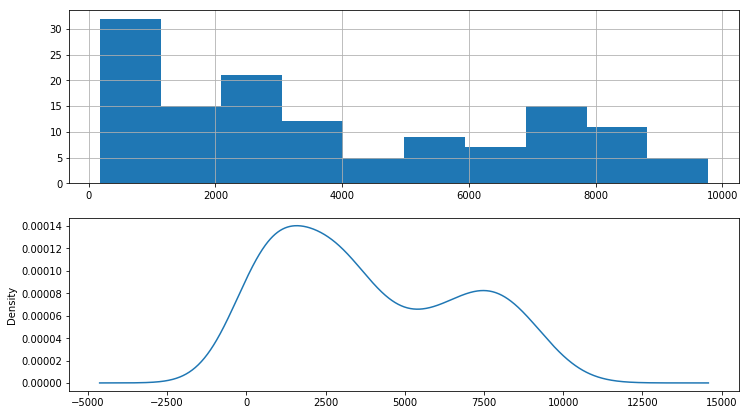


****chart 3

ADF Statistic: -1.813581
p-value: 0.373740
Critical Values:
	1%: -3.488
	5%: -2.887
	10%: -2.580


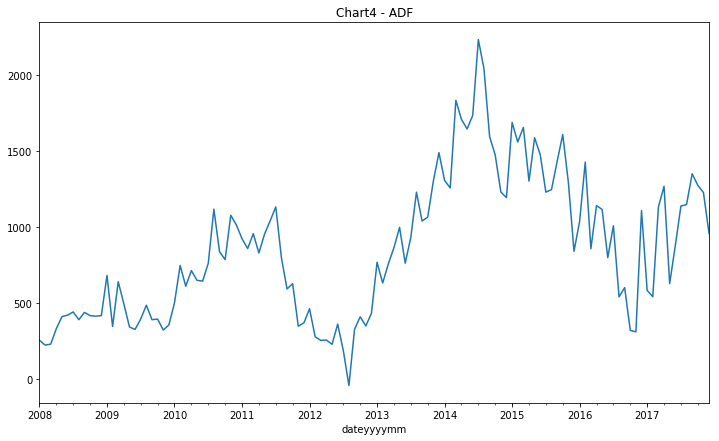

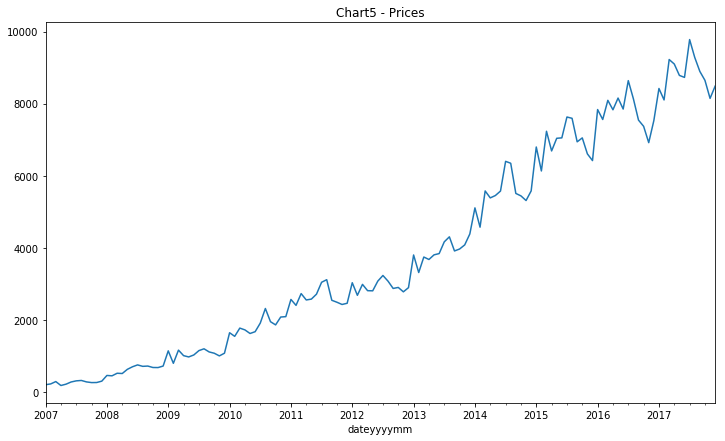

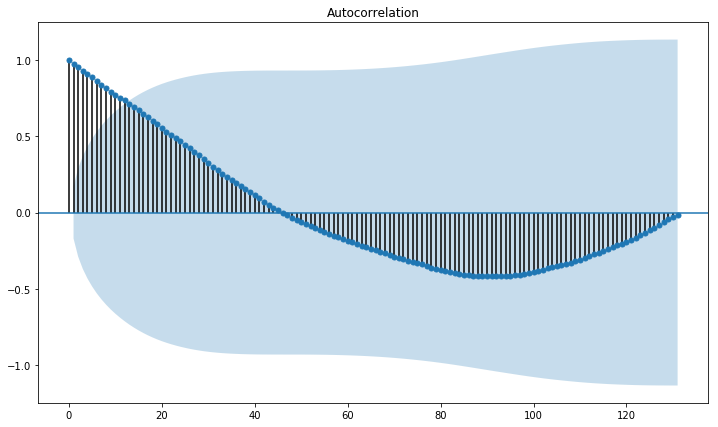

C:\Users\Richpat\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


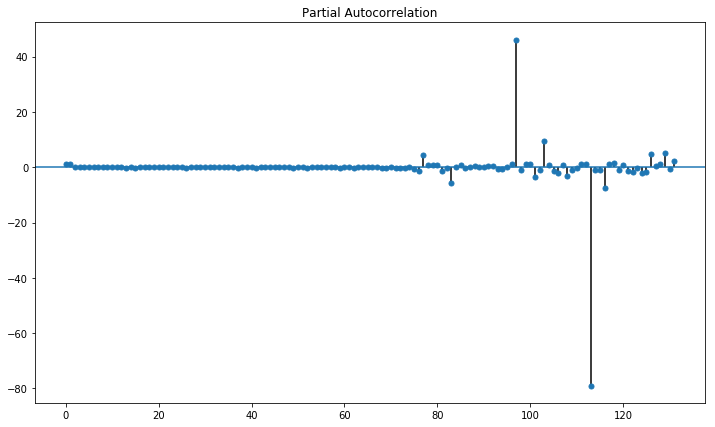


****before going into Prophet

max 2017-12-01
min 2007-01-01
                 y
count   132.000000
mean   3841.954545
std    2884.727441
min     172.000000
25%    1139.250000
50%    3003.000000
75%    6623.500000
max    9777.000000
     y          ds
1  216  2007-02-01
2  281  2007-03-01

****Type  Restaurant Review for AZ and NV Freq. Period  24 Freq. Type  M Verbose  1


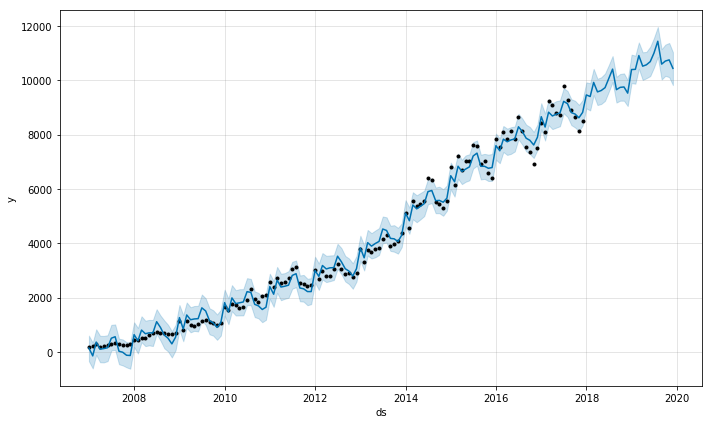

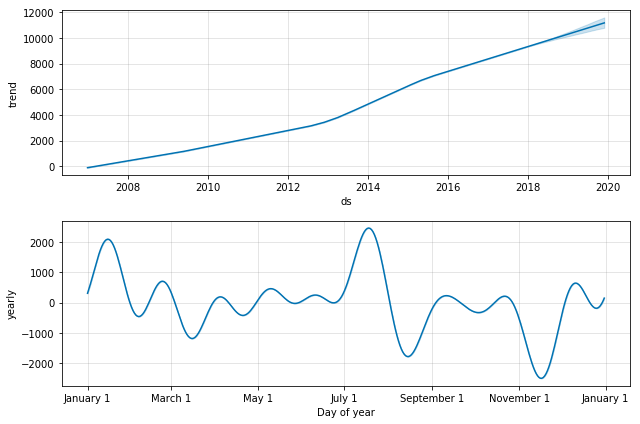


Start time of check 2019-06-20 21:15:55.360844 	End time of check 2019-06-20 21:15:57.869737

R-squared 0.9927276585528302

MSE 60059.42880893668

MAE 205.3873928157873
              trend    yhat_lower    yhat_upper   trend_lower   trend_upper  \
count    156.000000    156.000000    156.000000    156.000000    156.000000   
mean    4834.185687   4342.118914   5306.827272   4808.777304   4862.007308   
std     3515.306138   3501.185646   3522.537986   3473.726334   3562.249702   
min     -100.806979   -620.335074    336.712203   -100.806979   -100.806979   
25%     1678.778982   1222.237673   2167.911400   1678.778982   1678.778982   
50%     4074.069327   3594.079122   4563.658376   4074.069327   4074.069327   
75%     8050.339104   7400.077043   8370.162050   8050.339104   8050.339104   
max    11162.267737  10868.521272  11967.404907  10779.033952  11589.160064   

       additive_terms  additive_terms_lower  additive_terms_upper      yearly  \
count      156.000000            156.

C:\Users\Richpat\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Richpat\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Richpat\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda

In [11]:
#
prophetOut=pd.DataFrame()
prophetOut = prophetOut.append(runfixNforecast(OurReviewsCatRestaurantsDF, "Restaurant Total Reviews", "2007-01-01", "2017-12-31", "Restaurant Review for AZ and NV", 1))
prophetOut = prophetOut.append(runfixNforecast(OurReviewsCatRestaurantsDF1st, "Restaurant 1 Star Reviews only", "2007-01-01", "2017-12-31", "Restaurant Review for AZ and NV", 0))
prophetOut = prophetOut.append(runfixNforecast(OurReviewsCatRestaurantsDF2st, "Restaurant 2 Star Reviews only", "2007-01-01", "2017-12-31", "Restaurant Review for AZ and NV", 0))
prophetOut = prophetOut.append(runfixNforecast(OurReviewsCatRestaurantsDF3st, "Restaurant 3 Star Reviews only", "2007-01-01", "2017-12-31", "Restaurant Review for AZ and NV", 0))
prophetOut = prophetOut.append(runfixNforecast(OurReviewsCatRestaurantsDF4st, "Restaurant 4 Star Reviews only", "2007-01-01", "2017-12-31", "Restaurant Review for AZ and NV", 0))
prophetOut = prophetOut.append(runfixNforecast(OurReviewsCatRestaurantsDF5st, "Restaurant 5 Star Reviews only", "2007-01-01", "2017-12-31", "Restaurant Review for AZ and NV", 0))
prophetOut.to_csv("tedtalksforecast.csv", sep=",", encoding = 'utf-8')

In [12]:
#Spaghetti chart 1
ourRestRevIn=pd.DataFrame(prophetOut.ID)
ourRestRevIn['ds']=prophetOut.ds
ourRestRevIn['yhat']=prophetOut.yhat
print("\n***** ourRestRevIn dtypes")
print(ourRestRevIn.dtypes)
print("\n***** ourRestRevIn describe")
print(ourRestRevIn.describe())
print("\n***** ourRestRevIn data (head)")
print(pd.DataFrame.head(ourRestRevIn))


***** ourRestRevIn dtypes
ID              object
ds      datetime64[ns]
yhat           float64
dtype: object

***** ourRestRevIn describe
               yhat
count    936.000000
mean    1610.955396
std     2262.820903
min     -157.615019
25%      326.086797
50%      784.879753
75%     1645.897261
max    11442.173341

***** ourRestRevIn data (head)
                         ID         ds        yhat
0  Restaurant Total Reviews 2007-01-01  142.087419
1  Restaurant Total Reviews 2007-02-01 -148.387284
2  Restaurant Total Reviews 2007-03-01  361.532303
3  Restaurant Total Reviews 2007-04-01  100.804758
4  Restaurant Total Reviews 2007-05-01  120.734938


In [13]:
#Spaghetti chart 2
#make 2 dataframe
# - a tall one with stars ratings forecast only
# - a side-by-side dataframe with stars ratings forecast

lookforall=['Restaurant 1 Star Reviews only',
            'Restaurant 2 Star Reviews only',
            'Restaurant 3 Star Reviews only',
            'Restaurant 4 Star Reviews only',
            'Restaurant 5 Star Reviews only']

ourRestRevByStars=pd.DataFrame()
ourRestRevSBS=pd.DataFrame()

#make tall dataframe

x=0
for lookfor in lookforall:
    x+=1
    ourRestRevtmp=ourRestRevIn[ourRestRevIn.ID==lookfor]
    ourRestRevByStars=ourRestRevByStars.append(ourRestRevtmp)

ourRestRevSBS=ourRestRevtmp.groupby('ds')['yhat'].sum() #agg({'Value':'mean'})
#ourRestRevSBS.index=ourRestRevtmp.index
ourRestRevSBS.columns = ['yhat']
ourRestRevSBS=pd.DataFrame(ourRestRevSBS)
print(pd.DataFrame.head(ourRestRevSBS))

#make side-by-side dataframe

x=0
for lookfor in lookforall:
    x+=1
    whichcol=str(x)+"Star"
    ourRestRevtmp=ourRestRevByStars[ourRestRevByStars.ID==lookfor]
    ourRestRevtmp = ourRestRevtmp.drop(columns = ['ID'])
    ourRestRevtmp.index = ourRestRevtmp.ds
    ourRestRevSBS[whichcol]=ourRestRevtmp.yhat
ourRestRevSBS = ourRestRevSBS.drop(columns = ['yhat'])

#print("\n***** ourRestRevByStars dtypes")
#print(ourRestRevByStars.dtypes)
#print("\n***** ourRestRevByStars describe")
#print(ourRestRevByStars.describe())
#print("\n***** ourRestRevByStars data (head)")
#print(pd.DataFrame.head(ourRestRevByStars))

print("\n***** ourRestRevSBS dtypes")
print(ourRestRevSBS.dtypes)
print("\n***** ourRestRevSBS describe")
print(ourRestRevSBS.describe())
print("\n***** ourRestRevSBS data (head)")
print(pd.DataFrame.head(ourRestRevSBS))

                 yhat
ds                   
2007-01-01  22.398859
2007-02-01 -67.065686
2007-03-01  88.678263
2007-04-01   2.881027
2007-05-01  21.491881

***** ourRestRevSBS dtypes
1Star    float64
2Star    float64
3Star    float64
4Star    float64
5Star    float64
dtype: object

***** ourRestRevSBS describe
             1Star       2Star        3Star        4Star        5Star
count   156.000000  156.000000   156.000000   156.000000   156.000000
mean    664.499772  438.480685   555.281247  1086.785186  2096.720868
std     588.517024  283.468692   301.124574   582.350686  1838.194079
min     -61.543881  -34.639286   -19.806317   -23.582546  -157.615019
25%     129.491058  182.106961   294.882906   592.401219   504.971174
50%     461.134309  434.666619   592.312337  1179.459492  1433.599908
75%    1154.627525  699.376963   828.040718  1620.835693  3688.871862
max    1874.033200  939.095397  1030.451086  1976.561175  5765.523267

***** ourRestRevSBS data (head)
                1Star     

Text(0, 0.5, 'Count of Ratings')

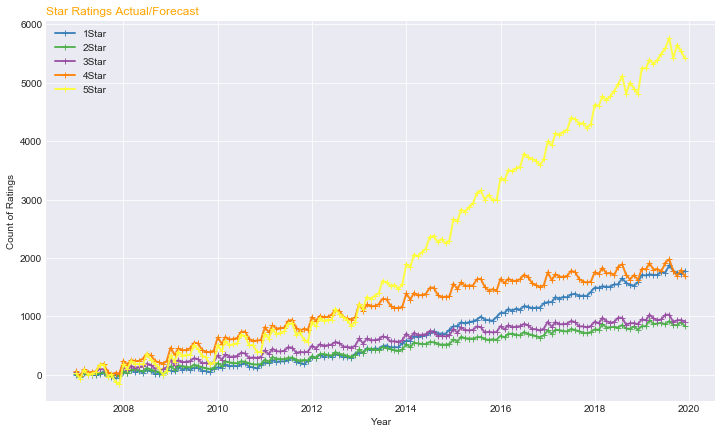

In [14]:
#Spaghetti chart 3
columns=pd.DataFrame(columns=['1Star', '2Star', '3Star', '4Star', '5Star'])

# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in columns:
    num+=1
    plt.plot(ourRestRevSBS.index, ourRestRevSBS[column], marker='+', color=palette(num), linewidth=2, alpha=0.9, label=column)
 
# Add legend
plt.legend(loc=2, ncol=1)

#width of display 
fig = plt.gcf()
fig.set_size_inches( 12, 7)
 
# Add titles
plt.title("Star Ratings Actual/Forecast", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Year")
plt.ylabel("Count of Ratings")


# ************************************************************************
# Code from here is unused and to be used as samples only
# ************************************************************************

In [15]:
#fit a regression model with more than 1 variable
#https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

#xx = wrkCoaches[[ 'Bonus',  'GSR', 'FGR', 'Capacity', 'CW', 'CL', 'CPF', 'CPA', 'OW', 'OL', 'OPF', 'OPA', 'HOME', 'AWAY']]
#yy = wrkCoaches[['TotalPay']]

#cc = smf.OLS(y, x, missing='drop').fit()
#predictions = model.predict(cc)
#cc.summary()

In [16]:
#count number of reviews by Restaurant
OurRestSelectorDF=pd.DataFrame(OurReviewsCatRestaurantsDF.groupby('business_id')['IsRestaurants'].count())
OurRestSelectorDF.columns = ['CntRestaurants']
OurRestSelectorDF.sort_values(by=['CntRestaurants'], ascending=False, inplace=True)


30


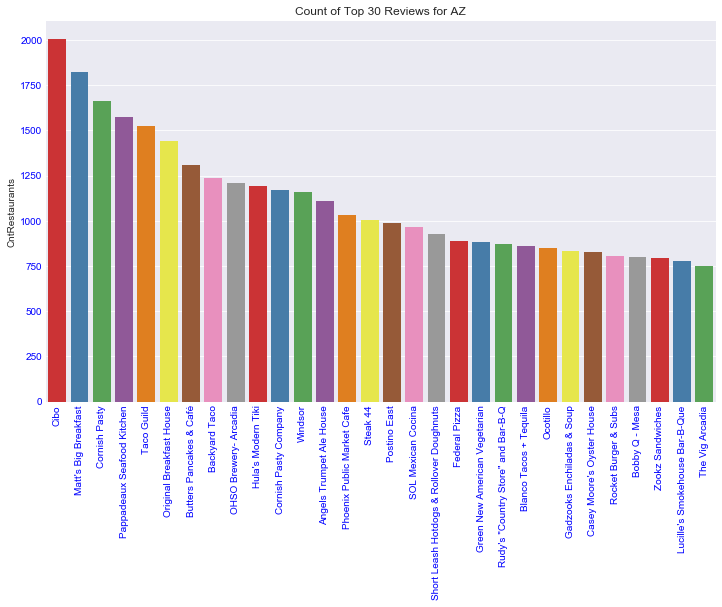

30


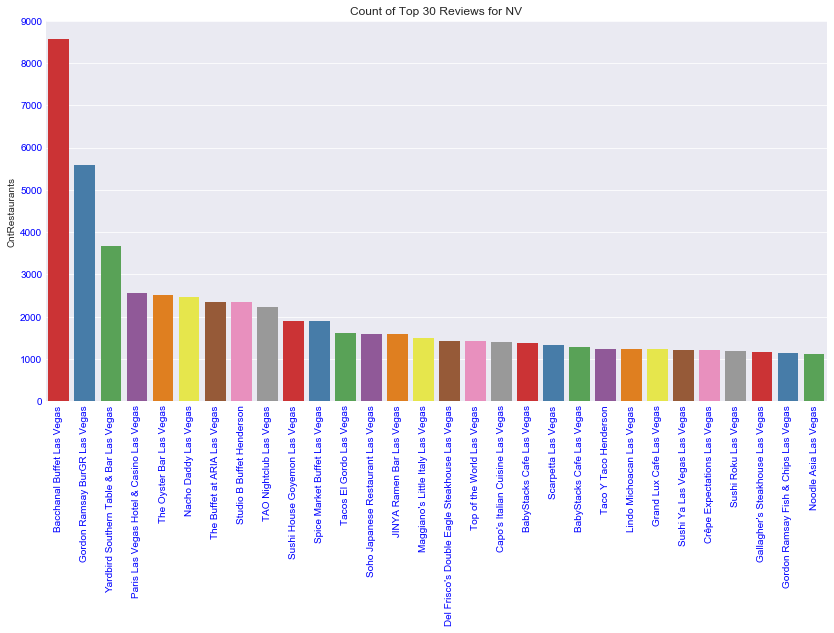

In [17]:
# Count Plot (a.k.a. Bar Plot)
df=pd.DataFrame.head(OurRestSelectorDF, 30)
df=OurRestSelectorDF.merge(OurBusinessesDF,on='business_id', how='inner')
dfAZ=pd.DataFrame.head(df[df.state=='AZ'], 30)
dfNV=pd.DataFrame.head(df[df.state=='NV'], 30)
print(len(dfAZ))
sns.barplot(x=dfAZ.index, y=dfAZ.CntRestaurants, palette="Set1")
#xlabels, ylabels, title
bars=dfAZ.name
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars, color='blue', rotation=90)
plt.yticks(color='blue')
plt.title('Count of Top 30 Reviews for AZ')
fig = plt.gcf()
fig.set_size_inches( 12, 7)
plt.show()

print(len(dfNV))
sns.barplot(x=dfNV.index, y=dfNV.CntRestaurants, palette="Set1")
#xlabels, ylabels, title
bars=dfNV.name + ' ' + dfNV.city
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars, color='blue', rotation=90)
plt.yticks(color='blue')
plt.title('Count of Top 30 Reviews for NV')
fig = plt.gcf()
fig.set_size_inches( 14, 7)
plt.show()

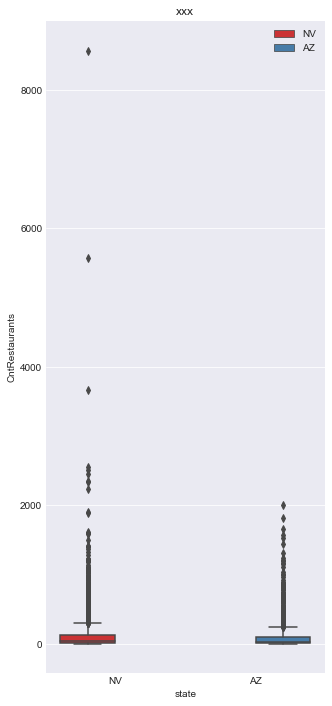

In [18]:
#df = sns.load_dataset('tips')
 
# Grouped boxplot
df1=df[(df.CntRestaurants<10000)]
sns.boxplot(x="state", y="CntRestaurants", hue="state", data=df1, palette="Set1")
plt.title('xxx')
plt.legend(loc='upper right',ncol=1)
fig = plt.gcf()
fig.set_size_inches( 5, 12)
plt.show()

5644
OurRevRestBusDF FB Prophet cnt:0 business:RESDUcs7fIiihp38-d6_6g length 8568

***** FB Prophet cnt:0 business:RESDUcs7fIiihp38-d6_6g Restaurant Review for AZ and NV

*********************************

Start of date transformation: date looks like 2017-01-14 21:30:33

432491    2015-01-18 15:36:53
432492    2015-08-19 04:35:10
432493    2014-01-17 00:50:50
432494    2012-11-06 06:06:19
432495    2017-08-16 04:29:09
Name: date, dtype: object


C:\Users\Richpat\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Richpat\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Richpat\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda


End of date transformation: date looks like 2017-01-14

dateyyyymm
2012-09-01     83
2012-10-01    126
2012-11-01     97
2012-12-01    120
2013-01-01    114
dtype: int64

***** isna (after) date transform

0

Rich Test for FB Prophet cnt:0 business:RESDUcs7fIiihp38-d6_6g

*********************************

***** fNfTall dtypes

int64

***** fNfTall describe

count     75.000000
mean     114.240000
std       22.605213
min       44.000000
25%       99.500000
50%      114.000000
75%      128.000000
max      166.000000
dtype: float64

***** fNfTall head

dateyyyymm
2012-10-01    126
dtype: int64

***** input data dfSeries dtypes

dateyyyymm
2012-09-01     83
2012-10-01    126
2012-11-01     97
2012-12-01    120
2013-01-01    114
dtype: int64

**SeriesCharting for  Restaurant Review for AZ and NV
dateyyyymm
2017-08-01    164
2017-09-01    128
2017-10-01    113
2017-11-01    114
2017-12-01    166
dtype: int64

****chart 1


******requires work to fix this


****chart 2



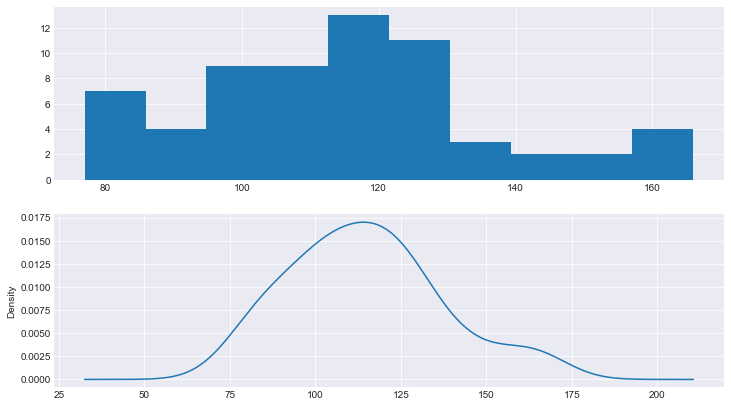


****chart 3

ADF Statistic: -4.005369
p-value: 0.001383
Critical Values:
	1%: -3.566
	5%: -2.920
	10%: -2.598


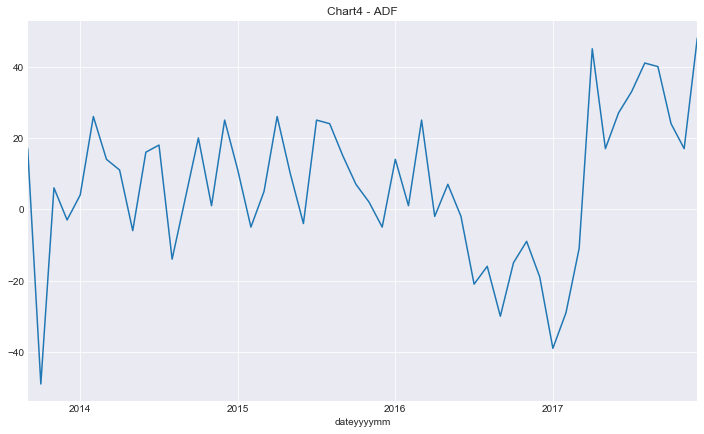

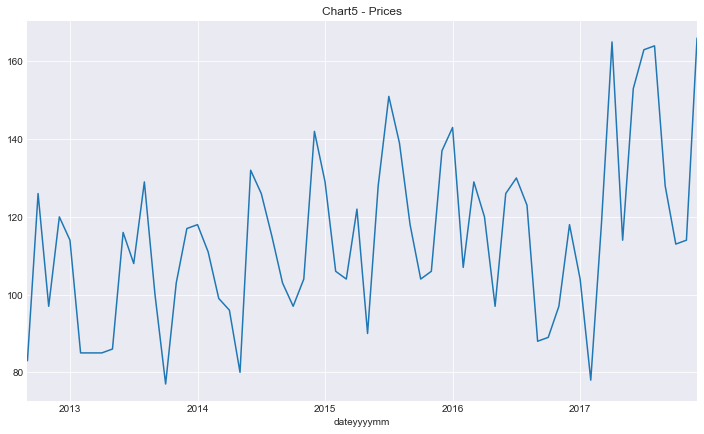

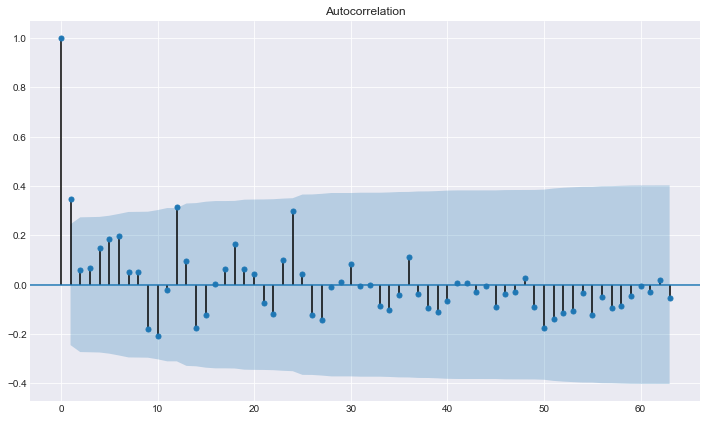

C:\Users\Richpat\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


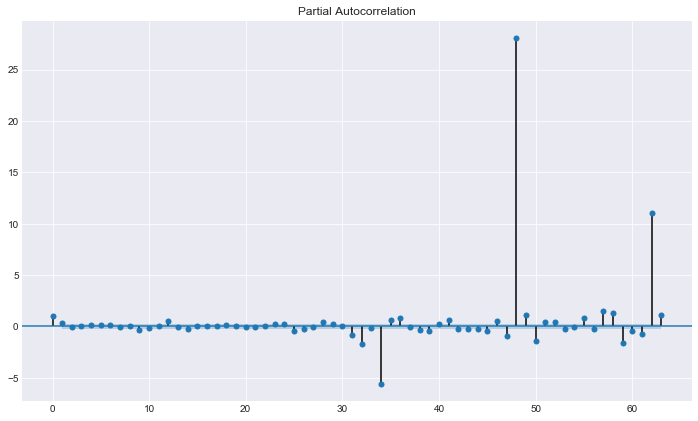


****before going into Prophet

max 2017-12-01
min 2012-09-01
                y
count   64.000000
mean   114.609375
std     22.167198
min     77.000000
25%     98.500000
50%    114.000000
75%    128.000000
max    166.000000
     y          ds
1  126  2012-10-01
2   97  2012-11-01

****Type  Restaurant Review for AZ and NV Freq. Period  24 Freq. Type  M Verbose  1


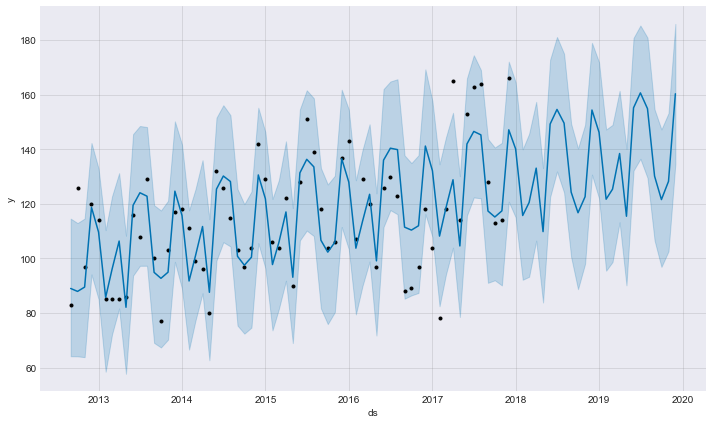

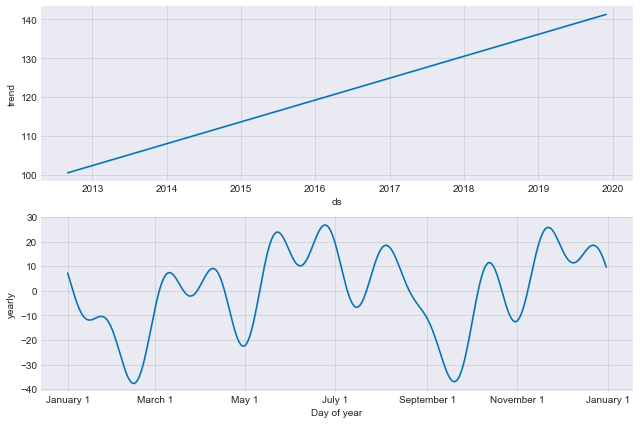


Start time of check 2019-06-20 21:16:15.182685 	End time of check 2019-06-20 21:16:18.291909

R-squared 0.6267385093734363

MSE 180.54911638263124

MAE 10.195508724085423
            trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
count   88.000000   88.000000   88.000000    88.000000    88.000000   
mean   120.908472   95.157414  145.339566   120.908156   120.908782   
std     11.961403   19.640486   19.533956    11.960941    11.961856   
min    100.550905   57.718102  108.330103   100.550905   100.550905   
25%    110.712746   81.218523  130.276045   110.712746   110.712746   
50%    120.905357   94.108036  145.633059   120.905357   120.905357   
75%    131.098230  107.965751  157.885954   131.098148   131.098315   
max    141.279102  136.514766  185.975874   141.276387   141.281836   

       additive_terms  additive_terms_lower  additive_terms_upper     yearly  \
count       88.000000             88.000000             88.000000  88.000000   
mean        -0.680096       

C:\Users\Richpat\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Richpat\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Richpat\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda


***** ourRestRevIn dtypes
ID              object
ds      datetime64[ns]
yhat           float64
dtype: object

***** ourRestRevIn describe
             yhat
count  439.000000
mean    24.070289
std     13.840899
min      2.523880
25%     12.713174
50%     20.289223
75%     34.008806
max     58.820158

***** ourRestRevIn data (head)
                               ID         ds       yhat
0  Restaurant 1 Star Reviews only 2012-10-01   2.523880
1  Restaurant 1 Star Reviews only 2012-11-01   4.744402
2  Restaurant 1 Star Reviews only 2012-12-01  17.825945
3  Restaurant 1 Star Reviews only 2013-01-01   8.703794
4  Restaurant 1 Star Reviews only 2013-02-01   3.766024
                 yhat
ds                   
2012-09-01  38.892198
2012-10-01  41.988995
2012-11-01  38.323705
2012-12-01  40.021040
2013-01-01  39.633069

***** ourRestRevSBS dtypes
1Star    float64
2Star    float64
3Star    float64
4Star    float64
5Star    float64
dtype: object

***** ourRestRevSBS describe
           1Star    

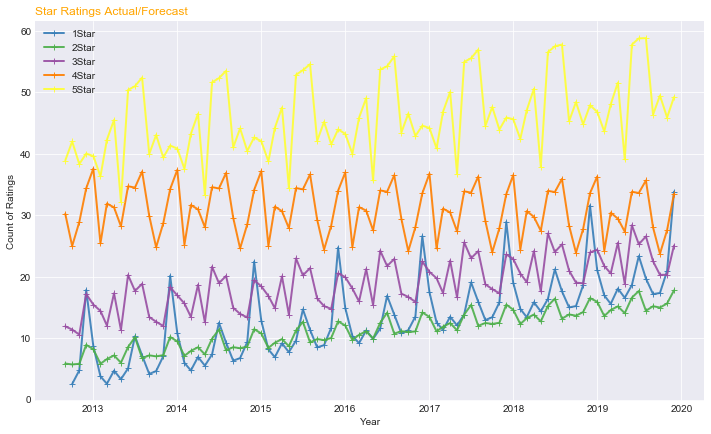

OurRevRestBusDF FB Prophet cnt:1 business:cYwJA2A6I12KNkm2rtXd5g length 5575

***** FB Prophet cnt:1 business:cYwJA2A6I12KNkm2rtXd5g Restaurant Review for AZ and NV

*********************************

Start of date transformation: date looks like 2017-01-14 21:30:33

747450    2014-06-27 20:57:49
747451    2015-05-26 08:14:47
747452    2016-07-25 06:05:55
747453    2013-11-14 02:40:58
747454    2014-10-27 03:56:42
Name: date, dtype: object


C:\Users\Richpat\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Richpat\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Richpat\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda


End of date transformation: date looks like 2017-01-14

dateyyyymm
2012-12-01    20
2013-01-01    56
2013-02-01    49
2013-03-01    84
2013-04-01    71
dtype: int64

***** isna (after) date transform

0

Rich Test for FB Prophet cnt:1 business:cYwJA2A6I12KNkm2rtXd5g

*********************************

***** fNfTall dtypes

int64

***** fNfTall describe

count     68.000000
mean      81.985294
std       47.511033
min        1.000000
25%       54.250000
50%       95.000000
75%      116.750000
max      159.000000
dtype: float64

***** fNfTall head

dateyyyymm
2013-01-01    56
dtype: int64

***** input data dfSeries dtypes

dateyyyymm
2012-12-01    20
2013-01-01    56
2013-02-01    49
2013-03-01    84
2013-04-01    71
dtype: int64

**SeriesCharting for  Restaurant Review for AZ and NV
dateyyyymm
2017-08-01     6
2017-09-01    10
2017-10-01     3
2017-11-01     4
2017-12-01     5
dtype: int64

****chart 1


******requires work to fix this


****chart 2



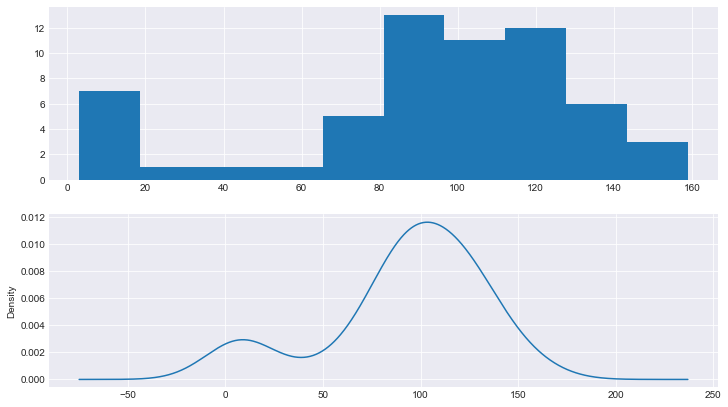


****chart 3

ADF Statistic: -1.506081
p-value: 0.530501
Critical Values:
	1%: -3.581
	5%: -2.927
	10%: -2.602


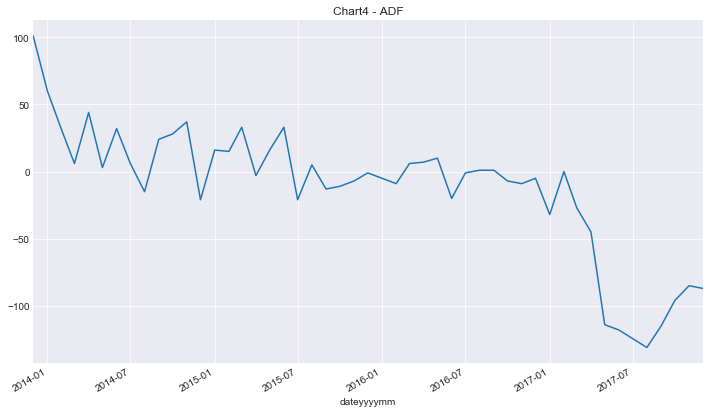

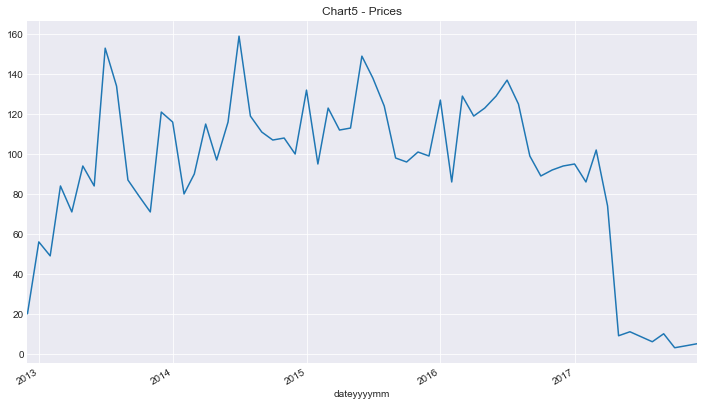

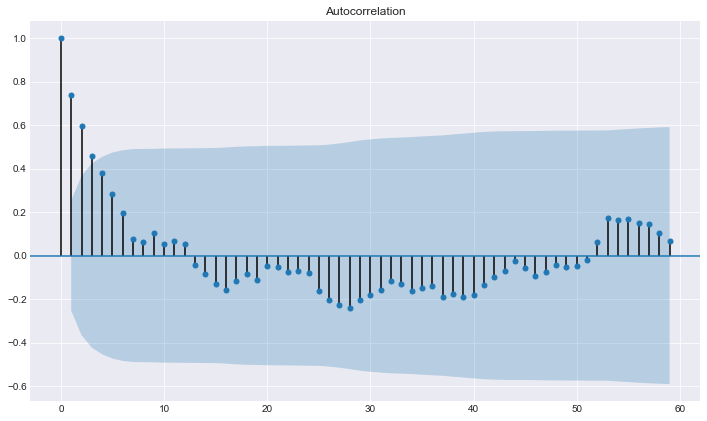

C:\Users\Richpat\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


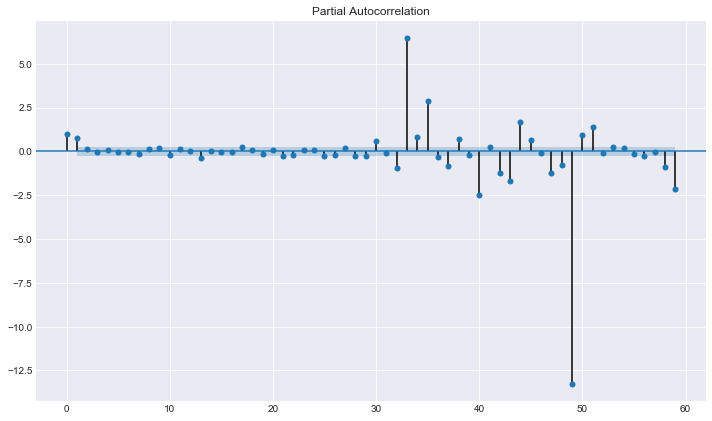


****before going into Prophet

max 2017-12-01
min 2012-12-01
                y
count   60.000000
mean    92.583333
std     39.902547
min      3.000000
25%     83.000000
50%     98.500000
75%    119.500000
max    159.000000
    y          ds
1  56  2013-01-01
2  49  2013-02-01

****Type  Restaurant Review for AZ and NV Freq. Period  24 Freq. Type  M Verbose  1


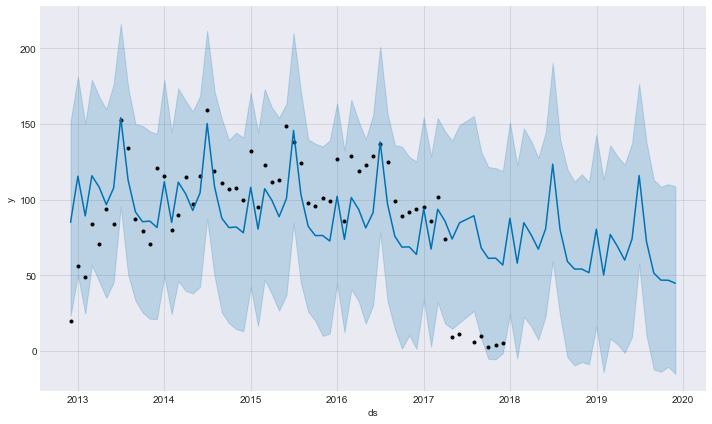

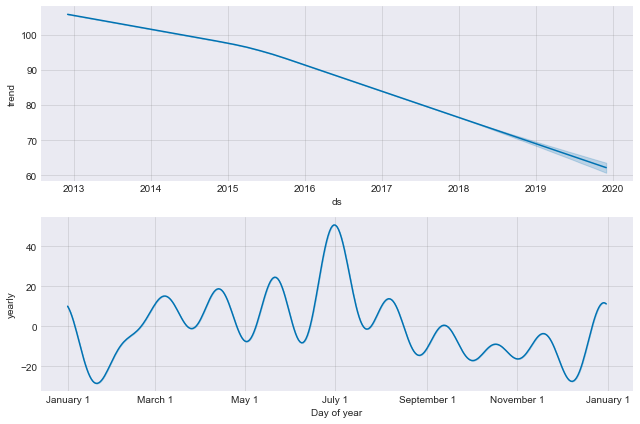


Start time of check 2019-06-20 21:16:31.009696 	End time of check 2019-06-20 21:16:33.599960

R-squared 0.330899619635898

MSE 1047.5946673326494

MAE 25.944577212686756
            trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
count   84.000000   84.000000   84.000000    84.000000    84.000000   
mean    86.856395   24.163973  148.413298    86.680360    87.030063   
std     13.438727   23.608180   23.884511    13.713443    13.173385   
min     62.233760  -15.041459  108.567572    60.773788    63.632896   
25%     75.141426    9.232644  134.413299    75.067499    75.219557   
50%     88.620723   22.947009  144.802928    88.620723    88.620723   
75%     99.044780   38.509736  163.580735    99.044780    99.044780   
max    105.832038   95.554829  216.193433   105.832038   105.832038   

       additive_terms  additive_terms_lower  additive_terms_upper     yearly  \
count       84.000000             84.000000             84.000000  84.000000   
mean        -0.757193        

C:\Users\Richpat\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Richpat\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Richpat\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda


***** ourRestRevIn dtypes
ID              object
ds      datetime64[ns]
yhat           float64
dtype: object

***** ourRestRevIn describe
             yhat
count  403.000000
mean    18.669306
std     12.978195
min      2.899036
25%      7.393888
50%     14.114343
75%     29.852999
max     55.205446

***** ourRestRevIn data (head)
                               ID         ds      yhat
0  Restaurant 1 Star Reviews only 2012-12-01  6.563171
1  Restaurant 1 Star Reviews only 2013-01-01  5.724402
2  Restaurant 1 Star Reviews only 2013-02-01  3.895591
3  Restaurant 1 Star Reviews only 2013-03-01  4.921417
4  Restaurant 1 Star Reviews only 2013-04-01  5.483523
                 yhat
ds                   
2012-12-01  27.528616
2013-01-01  36.975995
2013-02-01  30.875509
2013-03-01  44.938941
2013-04-01  37.450814

***** ourRestRevSBS dtypes
1Star    float64
2Star    float64
3Star    float64
4Star    float64
5Star    float64
dtype: object

***** ourRestRevSBS describe
           1Star      2Sta

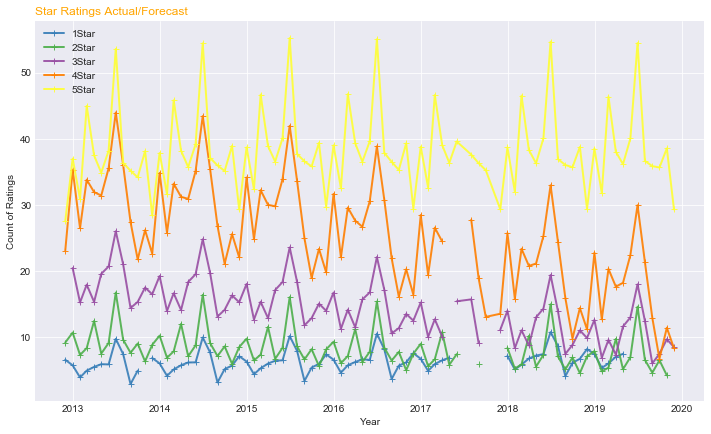

In [19]:
#initialise
buffer= 100
buffercnt = 0
prophetOut=pd.DataFrame()

print(len(OurRestSelectorDF))
#for x in range(0, len(OurRestSelectorDF)):
for x in range(0,2):
    #get for one zip (anyone)
    BusinessIdentifier = OurRestSelectorDF.take([x]) # business_id is index
    zBusinessID=BusinessIdentifier.index.values[0]
#    print (zBusinessID)
    BusinessDtls=OurBusinessesDF[(OurBusinessesDF.business_id==zBusinessID)]
#    zBusinessID=BusinessIdentifier.iloc[0]['business_id']
    BusinessTitle='FB Prophet cnt:' + str(x) + " business:"+ zBusinessID
    OurRevRestBusDF=OurReviewsWithCategoriesDF[(OurReviewsWithCategoriesDF.business_id==zBusinessID)]
    noReviews=len(OurRevRestBusDF)
#    print (BusinessDtls.name.values[0], '|', 
#           BusinessDtls.address.values[0], '|', 
#           BusinessDtls.city.values[0], '|', 
#           BusinessDtls.postal_code.values[0], '|'
#          'Number of Reviews', noReviews)
#    print (BusinessDtls.attributes.values[0])
#    print (BusinessDtls.attributes.values)
#    print (dict(BusinessDtls.attributes))
    if noReviews >= 1:
        print('OurRevRestBusDF', BusinessTitle, 'length', noReviews)
        prophetOut = prophetOut.append(runfixNforecast(OurRevRestBusDF, BusinessTitle, "2012-01-01", "2017-12-31", "Restaurant Review for AZ and NV", 1))
    buffercnt+=1
    #print('Zillow Forecast tail', buffercnt, zillowForecast.tail())
    if 0 == (buffercnt % buffer):
        print ('write to file: cnt = ', buffercnt)
        prophetOut.to_csv("tedtalksforecastbus.csv", sep=",", encoding = 'utf-8')
    #6/20/2019 6:30pm add next level down forecasting and spaghetti chart printing
    #next level down of stars
    #
    print('OurRevRestBusDF', BusinessTitle, 'length', noReviews)
    OurRevRestBus1stDF=OurReviewsWithCategoriesDF[(OurReviewsWithCategoriesDF.business_id==zBusinessID)&(OurReviewsWithCategoriesDF.stars==1)]
    noReviews=len(OurRevRestBus1stDF)
    print('OurRevRestBusDF', BusinessTitle, 'length', noReviews)
    OurRevRestBus2ndDF=OurReviewsWithCategoriesDF[(OurReviewsWithCategoriesDF.business_id==zBusinessID)&(OurReviewsWithCategoriesDF.stars==2)]
    noReviews=len(OurRevRestBus2ndDF)
    print('OurRevRestBusDF', BusinessTitle, 'length', noReviews)
    OurRevRestBus3rdDF=OurReviewsWithCategoriesDF[(OurReviewsWithCategoriesDF.business_id==zBusinessID)&(OurReviewsWithCategoriesDF.stars==3)]
    noReviews=len(OurRevRestBus3rdDF)
    print('OurRevRestBusDF', BusinessTitle, 'length', noReviews)
    OurRevRestBus4thDF=OurReviewsWithCategoriesDF[(OurReviewsWithCategoriesDF.business_id==zBusinessID)&(OurReviewsWithCategoriesDF.stars==4)]
    noReviews=len(OurRevRestBus4thDF)
    print('OurRevRestBusDF', BusinessTitle, 'length', noReviews)
    OurRevRestBus5thDF=OurReviewsWithCategoriesDF[(OurReviewsWithCategoriesDF.business_id==zBusinessID)&(OurReviewsWithCategoriesDF.stars==5)]
    noReviews=len(OurRevRestBus5thDF)
    print('OurRevRestBusDF', BusinessTitle, 'length', noReviews)
    prophetOutB=pd.DataFrame()
    prophetOutB = prophetOutB.append(runfixNforecast(OurRevRestBus1stDF, "Restaurant 1 Star Reviews only", "2012-01-01", "2017-12-31", "Restaurant Review for AZ and NV", 0))
    prophetOutB = prophetOutB.append(runfixNforecast(OurRevRestBus2ndDF, "Restaurant 2 Star Reviews only", "2012-01-01", "2017-12-31", "Restaurant Review for AZ and NV", 0))
    prophetOutB = prophetOutB.append(runfixNforecast(OurRevRestBus3rdDF, "Restaurant 3 Star Reviews only", "2012-01-01", "2017-12-31", "Restaurant Review for AZ and NV", 0))
    prophetOutB = prophetOutB.append(runfixNforecast(OurRevRestBus4thDF, "Restaurant 4 Star Reviews only", "2012-01-01", "2017-12-31", "Restaurant Review for AZ and NV", 0))
    prophetOutB = prophetOutB.append(runfixNforecast(OurRevRestBus5thDF, "Restaurant 5 Star Reviews only", "2012-01-01", "2017-12-31", "Restaurant Review for AZ and NV", 0))
    spaghettiStarChart(prophetOutB)
    #
prophetOut.to_csv("tedtalksforecastbus.csv", sep=",", encoding = 'utf-8')


In [20]:
#load "our tips"
#

OurTipsDF = pd.read_csv("ouryelptipsbybusiness.csv", sep="|", encoding='utf-8')

print("\n***** head")
print(pd.DataFrame.head(OurTipsDF))


***** head
   Unnamed: 0             business_id  compliment_count                 date  \
0           3  TkoyGi8J7YFjA6SbaRzrxg                 0  2014-03-23 21:32:49   
1       92948  TkoyGi8J7YFjA6SbaRzrxg                 0  2013-05-22 01:16:20   
2      161883  TkoyGi8J7YFjA6SbaRzrxg                 0  2016-12-03 22:01:56   
3      187336  TkoyGi8J7YFjA6SbaRzrxg                 0  2013-06-07 01:42:53   
4      196318  TkoyGi8J7YFjA6SbaRzrxg                 0  2013-12-15 01:51:58   

                                                text                 user_id  
0  The setting and decoration here is amazing. Co...  FuTJWFYm4UKqewaosss1KA  
1  Come here for the teppan, it's delicious, but ...  D-sbvTWy1P2K9IbNCV2e6g  
2  If you come on a Friday or the weekend around ...  H6N_8SIbYRpTdIgIQiQW5g  
3           So far all the food we've tried is good.  6_EWgEEdYW-GE_CCTrjPHg  
4  Excellent food and chef puts on a very good show.  6_EWgEEdYW-GE_CCTrjPHg  


In [21]:
#initialise
buffer= 100
buffercnt = 0
prophetOut=pd.DataFrame()

#!pip install textblob
from textblob import TextBlob

def preprocess(TipsText):
    TipsText = TipsText.str.replace("(<br/>)", "")
    TipsText = TipsText.str.replace('(<a).*(>).*(</a>)', '')
    TipsText = TipsText.str.replace('(&amp)', '')
    TipsText = TipsText.str.replace('(&gt)', '')
    TipsText = TipsText.str.replace('(&lt)', '')
    TipsText = TipsText.str.replace('(\xa0)', ' ')  
    return TipsText

#for x in range(0, len(OurRestSelectorDF)):
for x in range(0,1):
    #get for one zip (anyone)
    BusinessIdentifier = OurRestSelectorDF.take([x]) # business_id is index
    zBusinessID=BusinessIdentifier.index.values[0]
#    print (zBusinessID)
    BusinessDtls=OurBusinessesDF[(OurBusinessesDF.business_id==zBusinessID)]
#    zBusinessID=BusinessIdentifier.iloc[0]['business_id']
    BusinessTitle='FB Prophet cnt:' + str(x) + " business:"+ zBusinessID
    OurTipsRestDF=pd.DataFrame(OurTipsDF[(OurTipsDF.business_id==zBusinessID)])
    noTips=len(OurTipsRestDF)
    print (BusinessDtls.name.values[0], '|', 
           BusinessDtls.address.values[0], '|', 
           BusinessDtls.city.values[0], '|', 
           BusinessDtls.postal_code.values[0], '|'
          'Number of Tips', noTips)
    OurTipsRestDF['text'] = preprocess(OurTipsRestDF['text'])
    OurTipsRestDF['polarity'] = OurTipsRestDF['text'].map(lambda text: TextBlob(text).sentiment.polarity)
    OurTipsRestDF['review_len'] = OurTipsRestDF['text'].astype(str).apply(len)
    OurTipsRestDF['word_count'] = OurTipsRestDF['text'].apply(lambda x: len(str(x).split()))
    print('5 random reviews with the highest positive sentiment polarity: \n')
    cl = OurTipsRestDF.loc[OurTipsRestDF.polarity < -.5, ['text']].sample(15).values
    for c in cl:
        print(c[0])



Bacchanal Buffet | 3570 S Las Vegas Blvd | Las Vegas | 89109.0 |Number of Tips 1264
5 random reviews with the highest positive sentiment polarity: 

Just saw cockroach  on the sushi table! Disgusting :(
Crazy looooong line!
MDW @ Bacchanal: The wait wasn't as bad as I thought. Oh wait... $87.00 with tax & tip?! Ouch! Not exactly up to par for the holiday.
The line is insane on thanksgiving day. Prepare to wait 3+ hours unless you opt for the express pass.
Rosiemaria working in the front provided terrible service! She gave our party (platinum members) attitude and even lost our ticket ! We had to wait even longer while 7 other parties seated ahead of us.
13 people in our group and my mom paid almost $800, 3 of which were children in our group. Very expensive! There were no lobsters or caviar at the buffet and if you want wine, you pay for it separately.
Worst customer service I have ever seen.
Option to order champagne, mimosa and bloody mary
Come before 7pm for dinner, otherwise expect

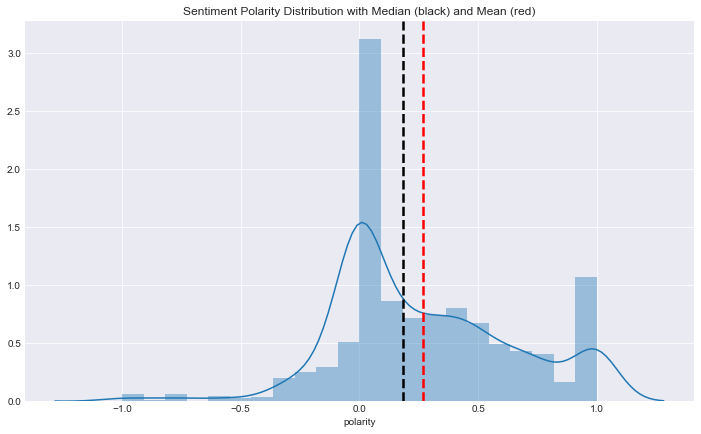

In [22]:
#sentiment distribution plot for tips

tp=OurTipsRestDF['polarity']
sal_plot=tp
ax = sns.distplot(sal_plot)
ax.axvline(sal_plot.median(), lw=2.5, ls='dashed', color='black')
ax.axvline(sal_plot.mean(), lw=2.5, ls='dashed', color='red')
plt.title('Sentiment Polarity Distribution with Median (black) and Mean (red)')
fig = plt.gcf()
fig.set_size_inches( 12, 7)
plt.show()

In [23]:
#load "our tips"
#

OurPhotosDF = pd.read_csv("ouryelpphotos.csv", sep="|", encoding='utf-8')

print("\n***** head")
print(pd.DataFrame.head(OurPhotosDF))


***** head
                 photo_id             business_id caption   label
0  YjxBE88Bf6CmTEF2LP1UNA  Kn23LDd740SBVJ7mum0fwg     NaN  inside
1  uJuz9MwcTUESdxLwmYqU9A  Kn23LDd740SBVJ7mum0fwg     bar  inside
2  rwXYyqN51p0ow02WVgfHgw  Kn23LDd740SBVJ7mum0fwg     NaN  inside
3  FHG5JVoDSOkMkQB3lv9jVg  Kn23LDd740SBVJ7mum0fwg     NaN  inside
4  Wl0bIYFcbp-PKMzu0p8gsw  Kn23LDd740SBVJ7mum0fwg     NaN  inside


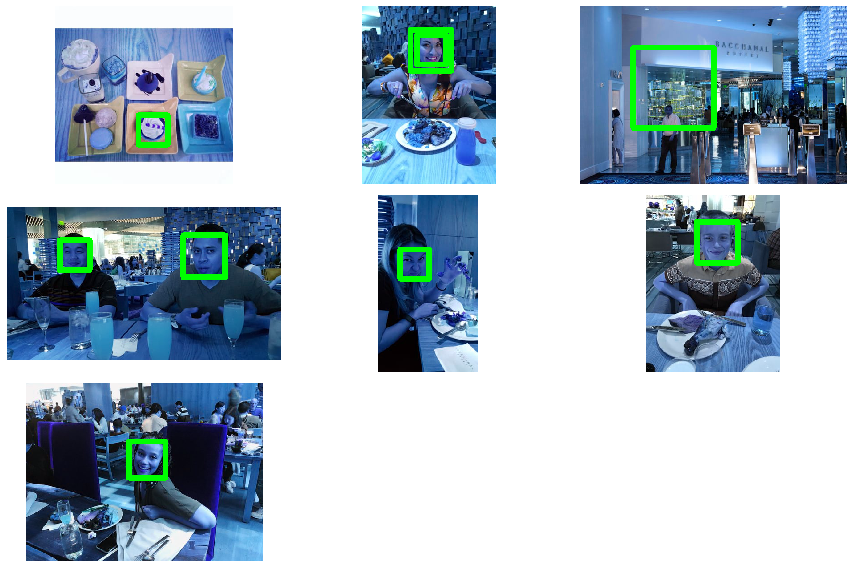


Photos reviewed 823

Found faces 7


In [24]:
#initialise
buffer= 100
buffercnt = 0
prophetOut=pd.DataFrame()
foundFacePhoto=0

import cv2
import sys
from matplotlib import pyplot as plt
import numpy as np

ROW=3 #5
COLUMN=3 #10
plt.figure(figsize=(12, 8)) 

#for x in range(0, len(OurRestSelectorDF)):
for x in range(0,1):
    #get for one zip (anyone)
    BusinessIdentifier = OurRestSelectorDF.take([x]) # business_id is index
    zBusinessID=BusinessIdentifier.index.values[0]
#    print (zBusinessID)
    BusinessDtls=OurBusinessesDF[(OurBusinessesDF.business_id==zBusinessID)]
#    zBusinessID=BusinessIdentifier.iloc[0]['business_id']
    BusinessTitle='FB Prophet cnt:' + str(x) + " business:"+ zBusinessID
    OurRestPhotosDF=pd.DataFrame(OurPhotosDF[(OurPhotosDF.business_id==zBusinessID)])
    noPhotos=len(OurRestPhotosDF)
#    print (BusinessDtls.name.values[0], '|', 
#           BusinessDtls.address.values[0], '|', 
#           BusinessDtls.city.values[0], '|', 
#           BusinessDtls.postal_code.values[0], '|'
#          'Number of Photos', noPhotos)
    for y in range(0, noPhotos):
        #print ('photos/' + OurRestPhotosDF.iloc[y]['photo_id'] +'.jpg')
        # GET IMAGES

        imagePath = ('photos/' + OurRestPhotosDF.iloc[y]['photo_id'] +'.jpg')
        cascPath = "haarcascade_frontalface_default.xml"
        image = cv2.imread(imagePath)
        #plt.imshow(image)
        #plt.show()

        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Create the haar cascade
        faceCascade = cv2.CascadeClassifier(cascPath)
        
        # Detect faces in the image
        faces = faceCascade.detectMultiScale(
            gray,
            scaleFactor=1.4,
            minNeighbors=5,
            minSize=(30,30)
            #flags = cv2.CV_HAAR_SCALE_IMAGE
        )
            #scaleFactor=1.2, #1.2
            #minNeighbors=5, #5
            #minSize=(30,30) #30,30

        if len(faces) > 0:
            foundFacePhoto+=1
            #print("Found {0} faces!".format(len(faces)))
            # Draw a rectangle around the faces
            for (x, y, w, h) in faces:
                cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 12)
    
            plt.subplot(ROW, COLUMN, foundFacePhoto)
            plt.imshow(image)
            #plt.show()
                               
            plt.xticks([])
            plt.yticks([])
            plt.tight_layout()
    
    plt.show()
    print ('\nPhotos reviewed', y+1)
    print ('\nFound faces', foundFacePhoto)
